#### Importing libraries and data ####

In [166]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import kstest
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='once')
data_red = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-red.csv',delimiter=';')
data_white = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-white.csv',delimiter=';')

#### Setting masks ####

In [167]:
mask_low_red = (data_red['quality']<=4)
mask_mid_red = ((data_red['quality']>4) & (data_red['quality']<7))
mask_high_red = (data_red['quality']>=7)

mask_low_white = (data_white['quality']<=4)
mask_mid_white = ((data_white['quality']>4) & data_white['quality']<7)
mask_high_white = (data_white['quality']>=7)

#### Defining functions ####

In [174]:
def chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=1):

    data_to_use = data_variable[mask_variable]
    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)

    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use))
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    normal_df['Bin'] = pd.cut(normal_df[column_variable], normal_df[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)

    data_test = data_to_use.groupby('Bin').count()[column_variable]
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

def ks_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    statistic , p_value = kstest(data_to_use,'norm', args=(data_to_use.mean(), data_to_use.std()))   
    
    return statistic, p_value

def compare_plot(mask_variable,column_variable,data_variable):
    
    data_to_use = data_variable[mask_variable][column_variable]

    rvs = np.random.normal(data_to_use.mean(),data_to_use.std(),len(data_to_use))
    
    norm_cdf = scipy.stats.norm.cdf(rvs)
    observed_cdf = scipy.stats.norm.cdf(data_to_use)
    
    sns.lineplot(x=rvs, y=norm_cdf)
    sns.lineplot(x=data_to_use, y=observed_cdf)
    plt.show()

#### Examples ####

In [169]:
chisquare_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red,bin_number=8,freedegree=1)

the min count in a bin is 19
the degrees of freedom used is 1


<ipython-input-168-434a35461f98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)


(4.858465608465608, 0.43339647127772307)

In [170]:
ks_func(mask_high_red,'pH',data_red)

(0.059607962745335086, 0.407821834485401)

#### Plots for project ####

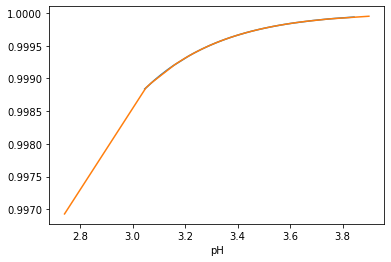

In [172]:
compare_plot(mask_low_red,'pH',data_red)